In [94]:
print("HEllo World")

HEllo World


In [95]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import *
from nltk.tokenize import word_tokenize
import numpy as np
import re

In [96]:
corpus=[
    "My name is shivam Kumar Srivastava .",
    "I am very scared of upcoming time in context of getting jobs and stuff65446846.  .!@#",
    "I am trying to hit the gym but can't control my cravings ar",
    "I am genuinly trying to study and get a job1807",
    "I am someone who deletes bumble and hinge instantly after installing it after ",
    "i luv ML & Ai... its soo cooool!!! #MachineLearning  #AI @OpenAI",
    
]

In [97]:
# Cleaning of data  
# # step by step 

# 1. convert the data into lower case
# 2. remove any numbers present int he data
# 3. remove any punctuation marks present in the data 
# LEARN ABOUT REGEX 
# 4. Tokenize the data using word_tokenize or split 
# 5. Remove Stopwords 

In [98]:
def preprocessing(text):
    text=text.lower()   # 1. convert the data into lower case
    text=re.sub(r'\d+',"",text)   # 2. remove any numbers present int he data
    text=text.translate(text.maketrans("","",string.punctuation))   # 3. remove any punctuation marks present in the data 
    word=word_tokenize(text)  # 4. Tokenize the data using word_tokenize or split 
    word=[i for i in word if i not in stopwords.words('english')]  # 5. Remove Stopwords 
    return word

In [99]:
corpus

['My name is shivam Kumar Srivastava .',
 'I am very scared of upcoming time in context of getting jobs and stuff65446846.  .!@#',
 "I am trying to hit the gym but can't control my cravings ar",
 'I am genuinly trying to study and get a job1807',
 'I am someone who deletes bumble and hinge instantly after installing it after ',
 'i luv ML & Ai... its soo cooool!!! #MachineLearning  #AI @OpenAI']

In [100]:
processed_data=[preprocessing(i) for i in corpus]
   
    

In [101]:
processed_data

[['name', 'shivam', 'kumar', 'srivastava'],
 ['scared', 'upcoming', 'time', 'context', 'getting', 'jobs', 'stuff'],
 ['trying', 'hit', 'gym', 'cant', 'control', 'cravings', 'ar'],
 ['genuinly', 'trying', 'study', 'get', 'job'],
 ['someone', 'deletes', 'bumble', 'hinge', 'instantly', 'installing'],
 ['luv', 'ml', 'ai', 'soo', 'cooool', 'machinelearning', 'ai', 'openai']]

In [102]:
word2vec_cbow=Word2Vec(sentences=processed_data ,vector_size=100, window=2, min_count=1, sg=0)
word2vec_sg=Word2Vec(sentences=processed_data ,vector_size=100, window=2, min_count=1, sg=1)

In [103]:
word2vec_cbow

In [104]:
word2vec_sg

In [105]:
word2vec_sg.wv["ai"]

array([-5.2527577e-04,  2.2852422e-04,  5.1038675e-03,  9.0138754e-03,
       -9.3118493e-03, -7.1298531e-03,  6.4655617e-03,  8.9950580e-03,
       -5.0193849e-03, -3.7812807e-03,  7.3941126e-03, -1.5326852e-03,
       -4.5419349e-03,  6.5572686e-03, -4.8584878e-03, -1.8161847e-03,
        2.8800352e-03,  9.8240562e-04, -8.2837725e-03, -9.4710961e-03,
        7.3136021e-03,  5.0691934e-03,  6.7684329e-03,  7.5484591e-04,
        6.3571515e-03, -3.4118651e-03, -9.4956910e-04,  5.7763155e-03,
       -7.5233076e-03, -3.9289575e-03, -7.5161476e-03, -9.3947531e-04,
        9.5544374e-03, -7.3275506e-03, -2.3350252e-03, -1.9361773e-03,
        8.0750277e-03, -5.9378450e-03,  4.8972008e-05, -4.7637532e-03,
       -9.6115777e-03,  5.0021778e-03, -8.7694777e-03, -4.3953378e-03,
       -3.2794986e-05, -3.0683671e-04, -7.6647629e-03,  9.6201962e-03,
        4.9836002e-03,  9.2520136e-03, -8.1684729e-03,  4.4944836e-03,
       -4.1437466e-03,  8.3176442e-04,  8.5137496e-03, -4.4667372e-03,
      

In [106]:
word2vec_sg.wv.most_similar('ai',topn=3)

[('shivam', 0.2187764197587967),
 ('context', 0.2162109762430191),
 ('instantly', 0.19536259770393372)]

In [107]:
word2vec_cbow.wv.most_similar('ai',topn=3)

[('shivam', 0.2187599539756775),
 ('context', 0.2161799520254135),
 ('instantly', 0.1953960508108139)]

In [108]:
word2vec_cbow.wv.similarity('ai','ml')

-0.14752528

In [109]:
word2vec_cbow.wv.similarity('ai','shivam')

0.21875997

In [110]:
word2vec_cbow.wv.similarity('srivastava','shivam')

0.048910037

In [112]:
word2vec_cbow.wv.most_similar("shivam")

[('ai', 0.2187599539756775),
 ('stuff', 0.1747603565454483),
 ('hit', 0.16378779709339142),
 ('instantly', 0.1420435607433319),
 ('cant', 0.10854044556617737),
 ('genuinly', 0.10757598280906677),
 ('cooool', 0.09874233603477478),
 ('luv', 0.09041532129049301),
 ('kumar', 0.06548558175563812),
 ('ar', 0.059569284319877625)]

In [115]:
word2vec_sg.wv.most_similar("shivam")

[('ai', 0.21877644956111908),
 ('stuff', 0.1747603565454483),
 ('hit', 0.16383858025074005),
 ('instantly', 0.1420435607433319),
 ('cant', 0.10853126645088196),
 ('genuinly', 0.10757598280906677),
 ('cooool', 0.0987870991230011),
 ('luv', 0.09038964658975601),
 ('kumar', 0.06548558175563812),
 ('ar', 0.059543151408433914)]

In [128]:
# //print the graph of dataset

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [129]:
word_vectors= word2vec_cbow.wv
vocab=list(word_vectors.index_to_key)
vocab

['ai',
 'trying',
 'openai',
 'getting',
 'cant',
 'gym',
 'hit',
 'stuff',
 'jobs',
 'context',
 'cravings',
 'time',
 'upcoming',
 'scared',
 'srivastava',
 'kumar',
 'shivam',
 'control',
 'ar',
 'machinelearning',
 'genuinly',
 'study',
 'get',
 'job',
 'someone',
 'deletes',
 'bumble',
 'hinge',
 'instantly',
 'installing',
 'luv',
 'ml',
 'soo',
 'cooool',
 'name']

In [130]:
len(vocab)

35

In [131]:
x=np.array([word_vectors[i] for i in vocab])

In [132]:
tsne=TSNE(n_components=2)

In [133]:
x_new_embeddings=tsne.fit_transform(x)

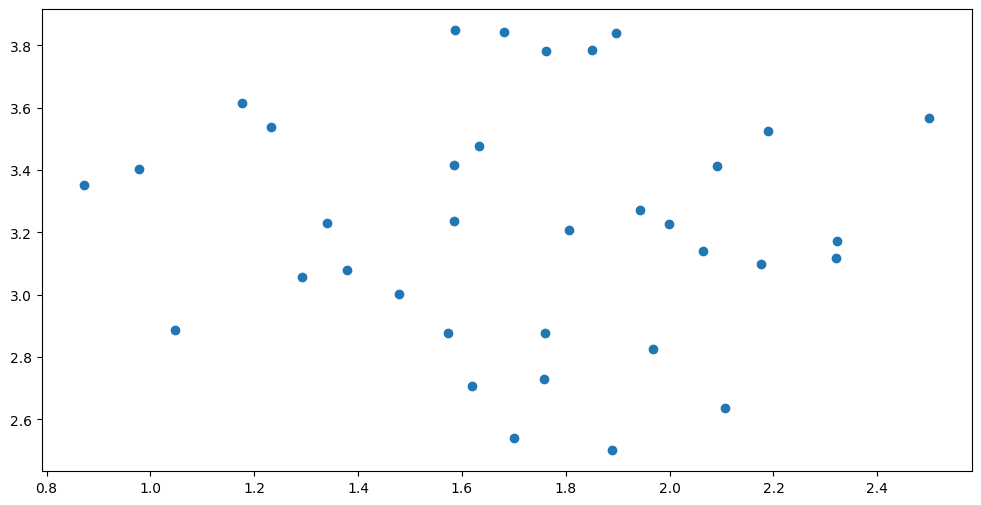

In [134]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embeddings[:,0],x_new_embeddings[:,1],marker="o")

In [135]:
vocab

['ai',
 'trying',
 'openai',
 'getting',
 'cant',
 'gym',
 'hit',
 'stuff',
 'jobs',
 'context',
 'cravings',
 'time',
 'upcoming',
 'scared',
 'srivastava',
 'kumar',
 'shivam',
 'control',
 'ar',
 'machinelearning',
 'genuinly',
 'study',
 'get',
 'job',
 'someone',
 'deletes',
 'bumble',
 'hinge',
 'instantly',
 'installing',
 'luv',
 'ml',
 'soo',
 'cooool',
 'name']

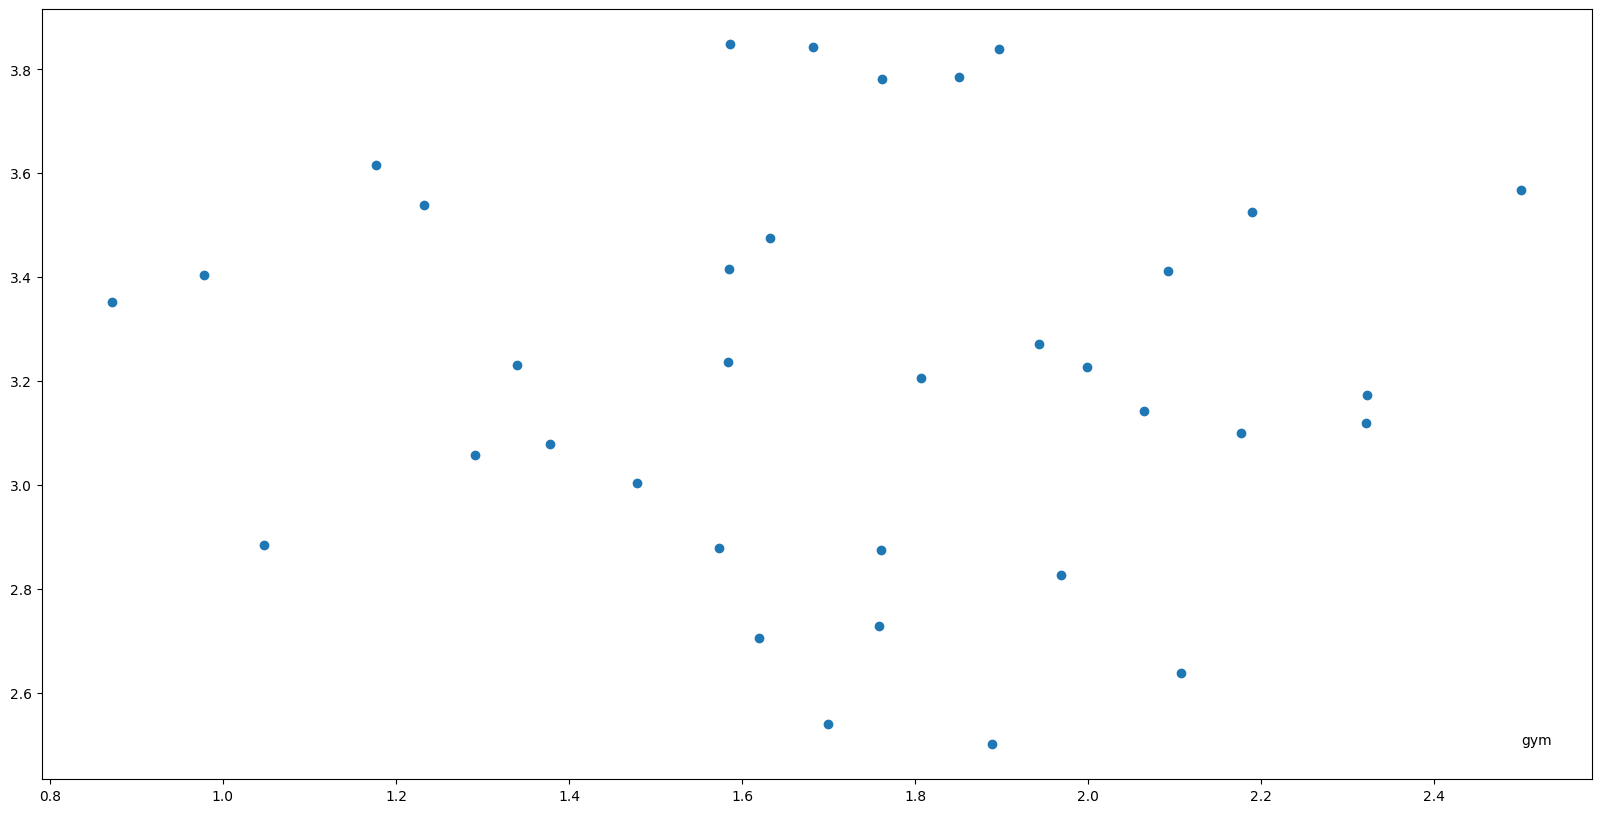

In [142]:
plt.figure(figsize=(20,10))
plt.scatter(x_new_embeddings[:,0],x_new_embeddings[:,1],marker="o")

for i,words in enumerate(vocab[:len(x_new_embeddings)]):
    plt.annotate(words,xy=(x_new_embeddings[i,0],x_new_embeddings[i,0]))